## Import dataframes

In [ ]:
# scale data - 1. scaler.fit_transform( train) --> scaler.transform( test_x) 
#    https://datascience.stackexchange.com/questions/27615/should-we-apply-normalization-to-test-data-as-well

# scale variables as well 
    # https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re#:~:text=Yes%2C%20you%20do%20need%20to%20scale%20the%20target%20variable.&text=A%20target%20variable%20with%20a,making%20the%20learning%20process%20unstable.

# time series help
# -https://machinelearningmastery.com/?s=time+series+validation+&post_type=post&submit=Search

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA


In [3]:
wind = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\wind.csv')
solar = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\solar.csv')

voltage_69s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_69s.csv')
voltage_13s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_13s.csv')
voltage_138s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_138s.csv')
voltage_34s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_34s.csv')

voltage_69w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_69w.csv')
voltage_13w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_13w.csv')
voltage_138w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_138w.csv')
voltage_34w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\voltage_34w.csv')

med_hr_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\median_hourly_solar2.csv')
mea_hr_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\mean_hourly_solar2.csv')
med_hr_w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\median_hourly_wind2.csv')
mea_hr_w = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\mean_hourly_wind2.csv')

In [4]:
thirteen_wk_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\thirteen_wk_s.csv')
sixnine_wk_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\sixnine_wk_s.csv')
onethreeeight_wk_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\onethreeeight_wk_s.csv')
thirtyfour_wk_s = pd.read_csv(r'C:\Users\Gabe\Desktop\Python\Springboard\LMP\thirtyfour_wk_s.csv')

In [93]:
#idea to find which 'type' is most ften off using confusion matrix
wind.head()

,datetime,pnode_id,pnode_name,voltage_kv,equipment,type,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,wind_generation_mw,fuel_type,mw,fuel_percentage_of_total,is_renewable,day_of_week
0,2020-07-01 00:00:00,49701,BELLSMIL,34.0,LD1B,LOAD,15.65,15.78,0.0,0.12,True,1,85.433,Wind,536.1,0.01,True,2
1,2020-07-01 00:00:00,49702,BELLSMIL,34.0,LD2B,LOAD,15.65,15.78,0.0,0.12,True,1,85.433,Wind,536.1,0.01,True,2
2,2020-07-01 00:00:00,49703,BELLSMIL,34.0,LD3B,LOAD,15.65,15.78,0.0,0.12,True,1,85.433,Wind,536.1,0.01,True,2
3,2020-07-01 00:00:00,49704,BELLSMIL,34.0,LD4B,LOAD,15.65,15.78,0.0,0.12,True,1,85.433,Wind,536.1,0.01,True,2
4,2020-07-01 00:00:00,49705,BELLSMIL,69.0,69-1,LOAD,15.65,15.76,0.0,0.10,True,1,85.433,Wind,536.1,0.01,True,2


In [92]:
#drop voltage column and make datetime index
voltage_69s.head()

,voltage_kv,datetime,pnode_id,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr,solar_generation_mw,mw,fuel_percentage_of_total,is_renewable
0,69.0,2020-07-01 00:00:00,6.628111e+08,15.65,15.665059,0.00,0.011647,1.0,1.0,-1.153,21.9,0.0,1.0
1,69.0,2020-07-01 01:00:00,6.628111e+08,15.24,15.266471,0.00,0.026235,1.0,1.0,-1.157,21.9,0.0,1.0
2,69.0,2020-07-01 02:00:00,6.628111e+08,14.43,14.490588,0.03,0.031529,1.0,1.0,-1.190,21.9,0.0,1.0
3,69.0,2020-07-01 03:00:00,6.628111e+08,13.66,13.695412,0.00,0.031882,1.0,1.0,-1.172,21.9,0.0,1.0
4,69.0,2020-07-01 04:00:00,6.628111e+08,13.44,13.473176,0.00,0.032000,1.0,1.0,-1.180,21.9,0.0,1.0


In [ ]:
#will want to hot code 'type' 

#can drop 'is_renewable'

In [5]:
#drop meaningless columns 


med_hr_s=med_hr_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable'], axis=1)
mea_hr_s=mea_hr_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable'], axis=1)
med_hr_w=med_hr_w.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable'], axis=1)
mea_hr_w=mea_hr_w.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable'], axis=1)

In [6]:
#drop meaningless columns 
thirteen_wk_s=thirteen_wk_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable','voltage_kv'], axis=1)
sixnine_wk_s=sixnine_wk_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable', 'voltage_kv'], axis=1)
onethreeeight_wk_s=onethreeeight_wk_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable', 'voltage_kv'], axis=1)
thirtyfour_wk_s=thirtyfour_wk_s.drop(['pnode_id', 'row_is_current', 'version_nbr', 'is_renewable', 'voltage_kv'], axis=1)

In [7]:
#set_index to datetime
thriteen_wk_s=thirteen_wk_s.set_index('datetime')
sixnine_wk_s=sixnine_wk_s.set_index('datetime')
onethreeeight_wk_s=onethreeeight_wk_s.set_index('datetime')
thirtyfour_wk_s=thirtyfour_wk_s.set_index('datetime')

In [8]:

med_hr_s=med_hr_s.set_index('datetime')
mea_hr_s=mea_hr_s.set_index('datetime')
med_hr_w=med_hr_w.set_index('datetime')
mea_hr_w=mea_hr_w.set_index('datetime')

In [110]:
mea_hr_w.head()

,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,wind_generation_mw,mw,fuel_percentage_of_total
datetime,,,,,,,
2020-07-01 00:00:00,15.65,15.672963,0.00,0.019676,85.433,536.1,0.01
2020-07-01 01:00:00,15.24,15.276157,0.00,0.034815,67.604,556.3,0.01
2020-07-01 02:00:00,14.43,14.498889,0.03,0.040324,43.109,647.5,0.01
2020-07-01 03:00:00,13.66,13.704028,0.00,0.041343,29.667,425.5,0.00
2020-07-01 04:00:00,13.44,13.482500,0.00,0.041343,17.329,334.2,0.00


## Train Test Split & Create Validation Sets

In [37]:
#credit for aapproach here: 
#https://github.com/manukalia/CA_Electricty_Price_Prediction_Neural_Net/blob/master/code/4_Pre-processing_for_Continuous_Targets.ipynb

train_set_length = int(round((mea_hr_s.shape[0] * 0.75), 0))
test_set_length = mea_hr_s.shape[0] - train_set_length

print(f'\nTrain: {train_set_length} rows\nTest:  {test_set_length} rows')

train_mea_s = mea_hr_s.iloc[: train_set_length]
test_mea_s  = mea_hr_s.iloc[train_set_length: ]


print(f'\nTrain set shape: {train.shape}\nTest set shape:  {test.shape}\n')


Train: 1639 rows
Test:  546 rows

Train set shape: (1639, 7)
Test set shape:  (546, 7)



In [ ]:
train_set_length = int(round((mea_hr_s.shape[0] * 0.75), 0))
test_set_length = mea_hr_s.shape[0] - train_set_length

print(f'\nTrain: {train_set_length} rows\nTest:  {test_set_length} rows')

train_mea_s = mea_hr_s.iloc[: train_set_length]
test_mea_s  = mea_hr_s.iloc[train_set_length: ]


print(f'\nTrain set shape: {train.shape}\nTest set shape:  {test.shape}\n')

#### Create Validation set 
Since this is a time-series data set, the temporal issue is of utmost importance, meaning you really cannot use future data in order to predict past events

So has to look something like this: https://community.dataquest.io/t/how-to-split-time-series-data-into-training-and-test-set/4116/2

* fold 1 : training [1], test [2]
* fold 2 : training [1 2], test [3]
* fold 3 : training [1 2 3], test [4]
* fold 4 : training [1 2 3 4], test [5]
* fold 5 : training [1 2 3 4 5], test [6]

## Scale Data


In [40]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

In [ ]:
#model_example

#scaler = preprocessing.StandardScaler() 
#ss = StandardScaler()

#remember that you need to train_test_split before scaling, no leakage 
#train_sc = ss.fit_transform(train)
#test_sc  = ss.transform(test)

In [38]:
train_mea_s.head() #will want to not normalize target i think

,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,solar_generation_mw,mw,fuel_percentage_of_total
datetime,,,,,,,
2020-07-01 00:00:00,15.65,15.672963,0.00,0.019676,-1.153,21.9,0.0
2020-07-01 01:00:00,15.24,15.276157,0.00,0.034815,-1.157,21.9,0.0
2020-07-01 02:00:00,14.43,14.498889,0.03,0.040324,-1.190,21.9,0.0
2020-07-01 03:00:00,13.66,13.704028,0.00,0.041343,-1.172,21.9,0.0
2020-07-01 04:00:00,13.44,13.482500,0.00,0.041343,-1.180,21.9,0.0


In [41]:
#standardize mean_hr_s
scaler = preprocessing.StandardScaler()
ss = StandardScaler()

train_sc = ss.fit_transform(train_mea_s)
test_sc = ss.transform(test_mea_s)

In [44]:
#after transformation we now have arrays and not dfs, need to make dfs again
train_sc_df = pd.Dataframe(train_sc, columns=train.columns, index=train.index)

(1639, 7)

In [45]:
train_sc_df = pd.DataFrame(train_sc, columns=train.columns, index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=test.columns, index=test.index)

## Create Categories 

## Create Baseline Prediction  to measure performance of ML models against 

#### https://machinelearningmastery.com/persistence-time-series-forecasting-with-python/

### Persisitance Model will be our baseline
#### Five Steps:
#### 1. Transform the univariate dataset into a supervised learning problem.
#### 2. Establish the train and test datasets for the test harness.
#### 3. Define the persistence model.
#### 4. Make a forecast and establish a baseline performance.
#### 5. Review the complete example and plot the output.

In [68]:
# Create Lagged dataset 
values = pd.DataFrame(mea_hr_s["total_lmp_rt"].values) #using values will only transfer values and not axs labels 
base_df = pd.concat([values.shift(1), values], axis=1)
base_df.columns = ['t-1', 't+1']
print(base_df.head(5))

         t-1        t+1
0        NaN  15.672963
1  15.672963  15.276157
2  15.276157  14.498889
3  14.498889  13.704028
4  13.704028  13.482500


In [111]:
mea_hr_s.head()

,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,solar_generation_mw,mw,fuel_percentage_of_total
datetime,,,,,,,
2020-07-01 00:00:00,15.65,15.672963,0.00,0.019676,-1.153,21.9,0.0
2020-07-01 01:00:00,15.24,15.276157,0.00,0.034815,-1.157,21.9,0.0
2020-07-01 02:00:00,14.43,14.498889,0.03,0.040324,-1.190,21.9,0.0
2020-07-01 03:00:00,13.66,13.704028,0.00,0.041343,-1.172,21.9,0.0
2020-07-01 04:00:00,13.44,13.482500,0.00,0.041343,-1.180,21.9,0.0


In [69]:
# Create train/test sets 
X = base_df.values
train_size = int(len(X) * 0.75)
train_base, test_base = X[1:train_size], X[train_size:]





In [70]:
#standardize 
train_base = ss.fit_transform(train_base)
test_base  = ss.transform(test_base)

In [72]:
#split X & y after the scaling 
train_X_base, train_y_base = train_base[:,0], train_base[:,1] 
test_X_base, test_y_base = test_base[:,0], test_base[:,1]

In [75]:
# peristsance model
def model_persistence(x):
    return(x)

In [81]:
# walk-forward validation
predictions = list()
for x in test_X_base:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_base_score = mean_squared_error(test_y_base, predictions)
print('Test MSE: %.3f' % test_base_score)


Test MSE: 0.642


## Models

### ARIMA

In [ ]:
###need to create lagged 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#SARIMA model
#https://campus.datacamp.com/courses/arima-models-in-python/chapter-4-seasonal-arima-models?ex=4

#Imports 
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Instantiate model 
model = SARIMAX(df, order=(p,d,q), seasonal=(P,D,Q,S))
            #non-seasonal orders     seasonal orders
            #P;autoregressive order  #P; seasonal autoregressive order  
            #d: differencing order   #D:seasonal differencing order
            #q: moving avergae order #Q:seasonal moving avg order 
                                     #S: number of time steps per cycle
#fit model 
results = model.fit()



#Seasonal(s) - Subtract teh time sereis value of one season ago
#first difference of tiime series is if here is a trend then you take normal difference
#second difference if seasonality present then take seasonal difference  
df_diff = df.diff(S) #S is an integer, the length of the seasonal cycle (24*7=168)

#one stationary the need to find non-seaosnla orders, use AC & PAC of the differenced time series 
#to find the seasonal orders we plot the ACF and PACF of the differenced time series at nultiple seasonal steps 

#create figure
fig, (ax1, ax2) = pltsubplots(2,1)

# plot seasonal ACF
plot_acf(df_diff, lags=[168,336,..], ax-ax1)

# plot seasonal PACF
plt_acf(df_diff, lags=[168,336,..], ax=ax2)

plt.show()

In [40]:
med_hr_s.tail(24)

,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,solar_generation_mw,mw,fuel_percentage_of_total
datetime,,,,,,,
2020-09-29 01:00:00,18.97,27.52,8.34,0.210,-1.187,0.0,0.00
2020-09-29 02:00:00,14.36,19.82,5.46,0.140,-1.163,0.0,0.00
2020-09-29 03:00:00,13.17,16.88,3.69,0.120,-1.184,0.0,0.00
2020-09-29 04:00:00,13.95,18.38,4.32,0.100,-1.173,0.0,0.00
2020-09-29 05:00:00,15.82,21.55,5.61,0.100,-1.153,0.0,0.00
2020-09-29 06:00:00,32.10,45.76,13.44,0.220,-1.144,0.0,0.00
2020-09-29 07:00:00,18.07,19.04,0.90,0.080,21.441,9.0,0.00
2020-09-29 08:00:00,43.68,73.43,30.03,0.230,58.471,128.5,0.00
2020-09-29 09:00:00,30.90,34.43,3.37,0.180,171.612,257.5,0.00


In [81]:
med_hr_s_train = med_hr_s['total_lmp_rt'].loc['2020-07-01': '2020-09-08']
med_hr_s_test = med_hr_s['total_lmp_rt'].loc['2020-09-08':]

In [50]:
len(med_hr_s_train)

1656

C:\Users\Gabe\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


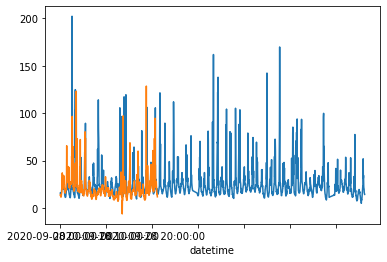

In [37]:
fig, ax = plt.subplots()

med_hr_s_train.plot(ax=ax)
med_hr_s_test.plot(ax=ax)
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller 
results = adfuller(med_hr_s_train)
print(results)

(-5.65267907419644, 9.778924804871363e-07, 25, 1630, {'1%': -3.4343681767217062, '5%': -2.863314793016078, '10%': -2.5677148609281493}, 13254.126412550426)


In [46]:
# Take the first and seasonal differences and drop NaNs
med_hr_s_train_diff = med_hr_s_train.diff().diff(168)

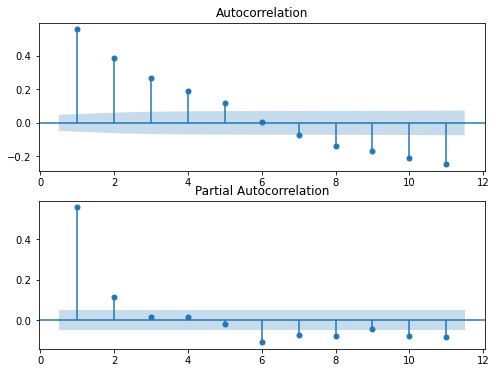

In [49]:
#non-seasonal 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(med_hr_s_train, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(med_hr_s_train, lags=11, zero=False, ax=ax2)

plt.show()
#so matbye SARIMAX(2,1,0) for nonseasonal portion?

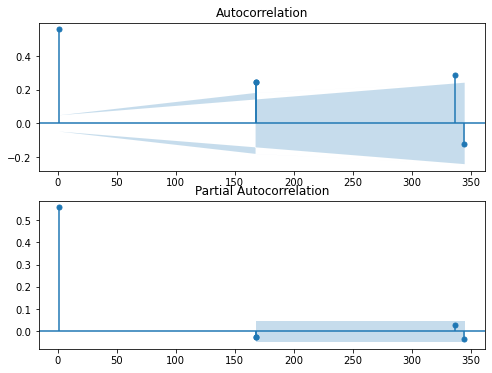

In [51]:
#Make a list of the first 5 seasonal lags and assign the result to lags.
lags = [168, 336, 168, 1,344]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(med_hr_s_train, lags=lags, ax=ax1)

# Plot the PACF on ax2
plot_pacf(med_hr_s_train, lags=lags, ax=ax2)

plt.show()

## Function to find lowest MSE params for p, d, q

In [67]:

for p in range(7):
    for d in range(7):
        for q in range(7):
            try:
                lmp_arima = ARIMA(endog =  med_hr_s_train, # Y variable
                              order = (p, d, q)) # (p, d, q)
                lmp_model = lmp_arima.fit()
                lmp_preds = lmp_model.predict()
                print(f'MSE for (p={p}, d={d}, q={q}) ... {mean_squared_error(med_hr_s_train, lmp_preds)}')
            
            except:
                pass
            
            

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=0, d=0, q=0) ... 313.1896077631078
MSE for (p=0, d=0, q=1) ... 242.56090340809877
MSE for (p=0, d=0, q=2) ... 223.1606057325372


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=0, d=0, q=3) ... 218.16152759680517
MSE for (p=0, d=0, q=4) ... 216.13003678514283


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=0, d=0, q=5) ... 212.24362365032616


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=0, d=0, q=6) ... 211.2534755453861


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=0) ... 215.68829673654218
MSE for (p=1, d=0, q=1) ... 212.8999499069644


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=2) ... 212.88981420944484


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=3) ... 212.87743264267968


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=4) ... 212.2639422247787


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=5) ... 211.0055678961073


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=1, d=0, q=6) ... 211.8562648983174


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_

MSE for (p=2, d=0, q=0) ... 212.95971635467646


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=1) ... 212.89051049985216


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=2) ... 208.4001117579215


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=3) ... 197.34646970053674


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=4) ... 191.42554435604222


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=5) ... 190.84761622661054


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=2, d=0, q=6) ... 190.78655986147677


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=3, d=0, q=0) ... 212.8974616466834
MSE for (p=3, d=0, q=1) ... 210.85739230691357


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=3, d=0, q=5) ... 190.66148495700148


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, Future

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels

MSE for (p=4, d=0, q=0) ... 212.85752980233997
MSE for (p=4, d=0, q=1) ... 209.59926304033334


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=4, d=0, q=2) ... 191.23493328685137


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\mode

MSE for (p=4, d=0, q=3) ... 190.98720888250324


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\mode

MSE for (p=4, d=0, q=4) ... 190.79901315148132


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_D

MSE for (p=4, d=0, q=5) ... 190.59793455986903


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_D

MSE for (p=4, d=0, q=6) ... 190.56409465986255


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=5, d=0, q=0) ... 212.7582363128038


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=5, d=0, q=1) ... 207.52283462540254


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=5, d=0, q=3) ... 190.5920139358787


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_m

MSE for (p=5, d=0, q=4) ... 190.50705708397732


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_D

MSE for (p=5, d=0, q=5) ... 190.11357930925007


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\mode

MSE for (p=5, d=0, q=6) ... 190.70810019567597


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=6, d=0, q=0) ... 210.25254555405343


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=6, d=0, q=1) ... 205.54079460885097


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

MSE for (p=6, d=0, q=2) ... 190.45216557722043


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_D

MSE for (p=6, d=0, q=3) ... 190.23678941928526


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_m

MSE for (p=6, d=0, q=4) ... 189.64586725025347


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_m

MSE for (p=6, d=0, q=5) ... 189.9666303761107


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_m

MSE for (p=6, d=0, q=6) ... 189.53838352899274


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

In [72]:
lmp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.total_lmp_rt   No. Observations:                 1654
Model:                 ARIMA(6, 2, 1)   Log Likelihood               -6872.590
Method:                       css-mle   S.D. of innovations             15.386
Date:                Tue, 09 Feb 2021   AIC                          13763.180
Time:                        15:24:07   BIC                          13811.878
Sample:                    07-01-2020   HQIC                         13781.233
                         - 09-07-2020                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.256e-05      0.000     -0.107      0.915      -0.001       0.001
ar.L1.D2.total_lmp_rt    -0.3947      0.025    -16.069      0.000      -0.443      -0.347
ar.L2.D2.total_lmp_rt    -0.2381      0.026     -9.015      0.000      -0.290      -0.186
ar.L3.D2.total_lmp_rt    -0.1817      0.027     -6.747      0.000      -0.234      -0.129
ar.L4.D2.total_lmp_rt    -0.1029      0.027     -3.823      0.000      -0.156      -0.050
ar.L5.D2.total_lmp_rt    -0.0239      0.026     -0.906      0.365      -0.076       0.028
ar.L6.D2.total_lmp_rt    -0.0484      0.025     -1.972      0.049      -0.096      -0.000
ma.L1.D2.total_lmp_rt    -1.0000      0.001   -670.556      0.000      -1.003      -0.997
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3512           -0.7454j            1.5432           -0.4198
AR.2           -1.3512           +0.7454j            1.5432            0.4198
AR.3            1.1434           -1.2936j            1.7265           -0.1348
AR.4            1.1434           +1.2936j            1.7265            0.1348
AR.5           -0.0393           -1.7062j            1.7067           -0.2537
AR.6           -0.0393           +1.7062j            1.7067            0.2537
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### MSE for (p=6, d=0, q=6) ... 189.53838352899274


## Instantiate and fit w/ best params

In [73]:
lmp_arima =ARIMA(endog = med_hr_s_train, order = (6,0,6))
lmp_model = lmp_arima.fit()
lmp_preds = lmp_model.predict()
print(mean_squared_error(med_hr_s_train, lmp_preds))

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

189.53838352899274


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [74]:
lmp_model.summary()

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           total_lmp_rt   No. Observations:                 1656
Model:                     ARMA(6, 6)   Log Likelihood               -6691.283
Method:                       css-mle   S.D. of innovations             13.703
Date:                Tue, 09 Feb 2021   AIC                          13410.566
Time:                        15:35:08   BIC                          13486.336
Sample:                    07-01-2020   HQIC                         13438.653
                         - 09-07-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 25.2417      0.604     41.810      0.000      24.058      26.425
ar.L1.total_lmp_rt     1.3878      0.002    577.367      0.000       1.383       1.393
ar.L2.total_lmp_rt    -0.4654      0.005    -99.653      0.000      -0.475      -0.456
ar.L3.total_lmp_rt    -0.0025      0.002     -1.063      0.288      -0.007       0.002
ar.L4.total_lmp_rt     0.8709        nan        nan        nan         nan         nan
ar.L5.total_lmp_rt    -1.4341        nan        nan        nan         nan         nan
ar.L6.total_lmp_rt     0.5063   8.17e-05   6198.716      0.000       0.506       0.506
ma.L1.total_lmp_rt    -1.0049      0.022    -45.431      0.000      -1.048      -0.962
ma.L2.total_lmp_rt     0.1293      0.012     11.140      0.000       0.107       0.152
ma.L3.total_lmp_rt     0.0091        nan        nan        nan         nan         nan
ma.L4.total_lmp_rt    -0.8696        nan        nan        nan         nan         nan
ma.L5.total_lmp_rt     1.1182      0.016     69.526      0.000       1.087       1.150
ma.L6.total_lmp_rt    -0.1364      0.024     -5.691      0.000      -0.183      -0.089
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0034           -0.0000j            1.0034           -0.5000
AR.2           -0.0287           -1.0013j            1.0017           -0.2546
AR.3           -0.0287           +1.0013j            1.0017            0.2546
AR.4            0.9659           -0.2588j            1.0000           -0.0417
AR.5            0.9659           +0.2588j            1.0000            0.0417
AR.6            1.9613           -0.0000j            1.9613           -0.0000
MA.1           -1.0001           -0.0000j            1.0001           -0.5000
MA.2           -0.0313           -0.9996j            1.0000           -0.2550
MA.3           -0.0313           +0.9996j            1.0000            0.2550
MA.4            0.9655           -0.2604j            1.0000           -0.0419
MA.5            0.9655           +0.2604j            1.0000            0.0419
MA.6            7.3287           -0.0000j            7.3287           -0.0000
-----------------------------------------------------------------------------
"""

In [79]:
lmp_arima =ARIMA(endog = med_hr_s_train, order = (10,0,10))
lmp_model_10010 = lmp_arima.fit()
lmp_preds_10010 = lmp_model_10010.predict()
print(mean_squared_error(med_hr_s_train, lmp_preds_10010))

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will 

186.6064654567234


C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [76]:
lmp_model.summary()

C:\Users\Gabe\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           total_lmp_rt   No. Observations:                 1656
Model:                   ARMA(10, 10)   Log Likelihood               -6677.913
Method:                       css-mle   S.D. of innovations             13.573
Date:                Tue, 09 Feb 2021   AIC                          13399.827
Time:                        15:56:57   BIC                          13518.894
Sample:                    07-01-2020   HQIC                         13443.964
                         - 09-07-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  25.2006      0.590     42.682      0.000      24.043      26.358
ar.L1.total_lmp_rt      0.1878   7.72e-05   2433.860      0.000       0.188       0.188
ar.L2.total_lmp_rt      0.1153      0.000    404.261      0.000       0.115       0.116
ar.L3.total_lmp_rt      0.0274      0.001     43.061      0.000       0.026       0.029
ar.L4.total_lmp_rt      0.7233      0.000   1558.859      0.000       0.722       0.724
ar.L5.total_lmp_rt      0.1639      0.000    840.893      0.000       0.164       0.164
ar.L6.total_lmp_rt     -0.3565   5.35e-05  -6668.310      0.000      -0.357      -0.356
ar.L7.total_lmp_rt      0.2262   4.84e-05   4673.242      0.000       0.226       0.226
ar.L8.total_lmp_rt     -0.8864   2.95e-07     -3e+06      0.000      -0.886      -0.886
ar.L9.total_lmp_rt     -0.1858        nan        nan        nan         nan         nan
ar.L10.total_lmp_rt     0.2545        nan        nan        nan         nan         nan
ma.L1.total_lmp_rt      0.1929      0.069      2.794      0.005       0.058       0.328
ma.L2.total_lmp_rt      0.0251      0.074      0.340      0.734      -0.120       0.170
ma.L3.total_lmp_rt     -0.0090      0.060     -0.149      0.882      -0.127       0.109
ma.L4.total_lmp_rt     -0.7333      0.044    -16.834      0.000      -0.819      -0.648
ma.L5.total_lmp_rt     -0.4421      0.030    -14.898      0.000      -0.500      -0.384
ma.L6.total_lmp_rt      0.1290      0.070      1.835      0.067      -0.009       0.267
ma.L7.total_lmp_rt     -0.2078      0.070     -2.967      0.003      -0.345      -0.071
ma.L8.total_lmp_rt      0.8332      0.089      9.355      0.000       0.659       1.008
ma.L9.total_lmp_rt      0.5114      0.040     12.634      0.000       0.432       0.591
ma.L10.total_lmp_rt    -0.0059      0.025     -0.235      0.814      -0.056       0.044
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9254           -0.3898j            1.0042           -0.4365
AR.2            -0.9254           +0.3898j            1.0042            0.4365
AR.3            -0.2120           -0.9833j            1.0059           -0.2838
AR.4            -0.2120           +0.9833j            1.0059            0.2838
AR.5             0.3161           -0.9539j            1.0049           -0.1991
AR.6             0.3161           +0.9539j            1.0049            0.1991
AR.7            -1.7450           -0.0000j            1.7450           -0.5000
AR.8             0.9660           -0.2587j            1.0000           -0.0416
AR.9             0.9660           +0.2587j            1.0000            0.0416
AR.10            2.1859           -0.0000j            2.1859           -0.0000
MA.1             0.9659

In [83]:
print(f'df:     {med_hr_s.shape[0]}')
print(f'train:  {med_hr_s_train.shape[0]}')
print(f'test:   {med_hr_s_test.shape[0]}')
print(f'trn+tst:{med_hr_s_train.shape[0] + med_hr_s_test.shape[0]}')


df:     2185
train:  1656
test:   529
trn+tst:2185


In [95]:
p = 10
d = 0
q = 10

lmp_train_preds_10010 = lmp_model_10010.predict(start = 0,
                                                 end = med_hr_s_train.shape[0]-1)


#represents the difference between the original and predicted values extracted by 
#squared the average difference over the data set.
print(f'MSE  Train ARIMA({p},{d},{q}) ... \
{mean_squared_error(med_hr_s_train, lmp_train_preds_10010):.2f}')


#(Coefficient of determination) represents the coefficient of how well the values fit compared to the original values. 
#The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.
print(f'R-sq Train ARIMA({p},{d},{q}) ... \
{r2_score(med_hr_s_train, lmp_train_preds_10010):.4f}')

MSE  Train ARIMA(10,0,10) ... 186.61
R-sq Train ARIMA(10,0,10) ... 0.4042


In [126]:
lmp_test_preds_10010 = lmp_model_10010.predict(start = med_hr_s_train.shape[0],
                                                 end = med_hr_s.shape[0]-1)

print(f'MSE  Test ARIMA({p},{d},{q}) ... \
{mean_squared_error(med_hr_s_test, lmp_test_preds_10010):.2f}')



print(f'R-sq Test ARIMA({p},{d},{q}) ... \
{r2_score(med_hr_s_test, lmp_test_preds_10010):.4f}')

MSE  Test ARIMA(10,0,10) ... 202.42
R-sq Test ARIMA(10,0,10) ... -0.0508


In [103]:
### Determine & plot resdiuals 

lmp_10010_train_resid = med_hr_s_train - lmp_train_preds_10010
lmp_10010_test_resid = med_hr_s_test - lmp_test_preds_10010

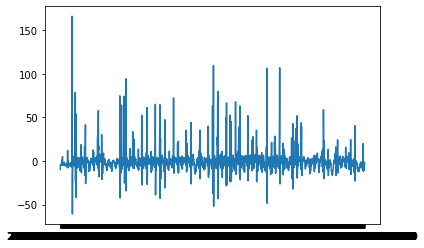

In [104]:
plt.plot(lmp_10010_train_resid);

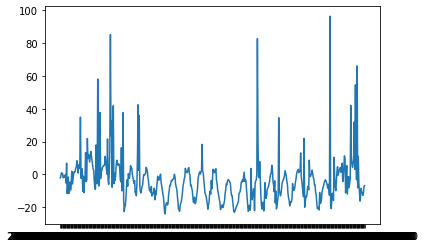

In [106]:
plt.plot(lmp_10010_test_resid)